In [33]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

#Model Evaluation
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,plot_roc_curve

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the test and train dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [42]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [3]:
#checking the shape of dataframe
print(test.shape, train.shape)

(153164, 2) (159571, 8)


In [4]:
pd.set_option('display.max_rows',None)

In [26]:
# check information of train data
print(train.info())

# check information of test data
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


In [6]:
#checking the null values in train data set
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [ ]:
#there is no null values available in the train data set.

<AxesSubplot:>

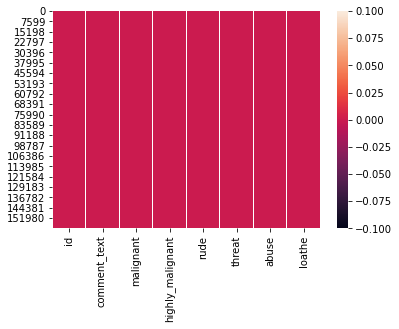

In [7]:
# check null values of train data using heatmap
sns.heatmap(train.isnull())

In [9]:
# check discriptive statistics of the train dataset
train.describe(include='all')

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,sources
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN,1
top,dabcdf834c536c96,Regarding the blocks \n\nHello. I am sorry abo...,NaN,NaN,NaN,NaN,NaN,NaN,train
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,159571
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,NaN
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,NaN
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [ ]:
#there is no duplicate data in the comment_text column.
#all the numerical feature having 0 and 1 values.

<AxesSubplot:>

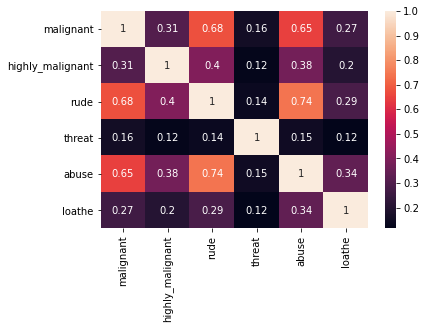

In [14]:
# check correlation of numerical features using heatmap
sns.heatmap(train.corr(), annot=True)

malignant


0    144277
1     15294
Name: malignant, dtype: int64


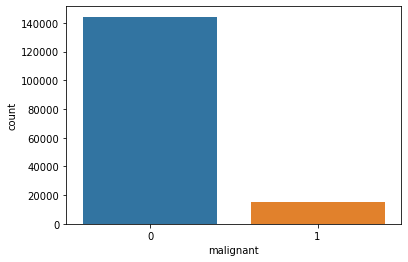

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


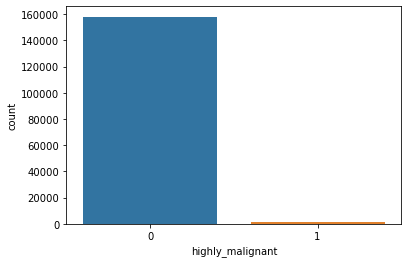

loathe


0    158166
1      1405
Name: loathe, dtype: int64


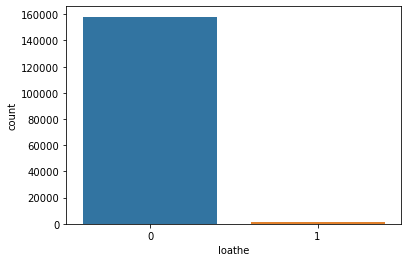

rude


0    151122
1      8449
Name: rude, dtype: int64


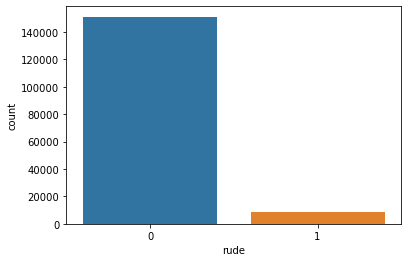

abuse


0    151694
1      7877
Name: abuse, dtype: int64


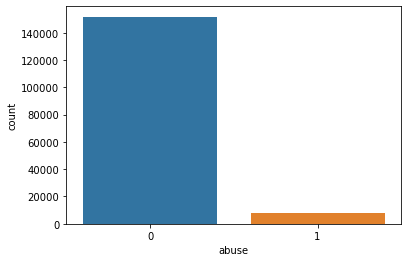

threat


0    159093
1       478
Name: threat, dtype: int64


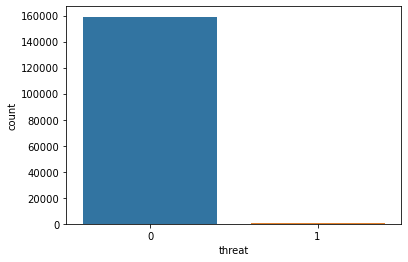

In [26]:
#checking the count plot for the target features.
column=['malignant','highly_malignant','loathe','rude','abuse','threat']

for i in column:
    print(i)
    print('\n')
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [ ]:
#here we can see that there is class imbalanced issue in every target.
#this will effect the final classification model so use upsampling to solve this problem.

In [4]:
#creating the label features by combining all the features.
all_labels=['malignant','highly_malignant','loathe','rude','abuse','threat']

train['label']=train[all_labels].sum(axis=1)

In [5]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


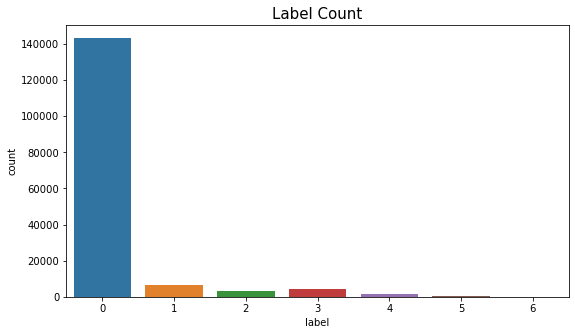

In [18]:
#plot label count Plot
plt.figure(figsize=(9,5))
sns.countplot(train['label'])
plt.title('Label Count',fontsize=15)
plt.show()

In [ ]:
#here 0=Good Comments and others=Bad Comments
#from the count plot it is claer that the good comments count is more as compare to bad comments count

In [6]:
# Here, we convert label column in form of 0 and 1 (scaling).

train['label']=train['label']>0
train['label']=train['label'].astype(int)

In [7]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [11]:
!pip install wordcloud

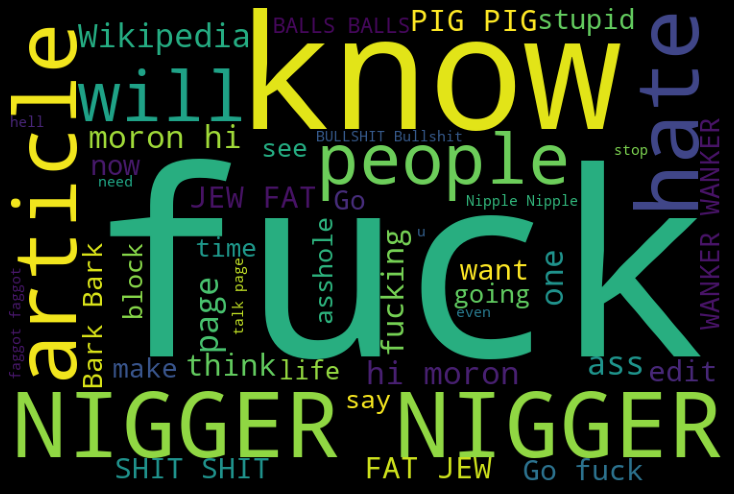

In [31]:
#using the wordcloud of malignent comments and check which type of word use for the malignet comments.
from wordcloud import WordCloud

harm=train['comment_text'][train['malignant'] == 1]
spam_cloud=WordCloud(height=500,width=750,background_color='black',max_words=45).generate(' '.join(harm))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

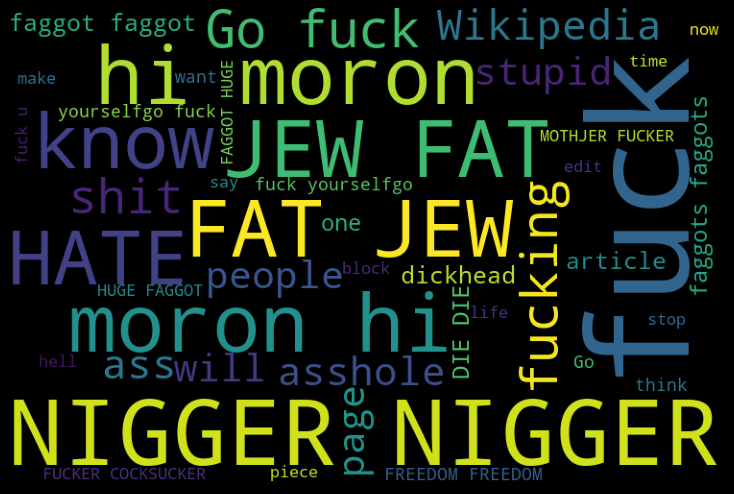

In [14]:
#now checking the abuse word from the commnets
#imshow() Function: The imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster
abuse=train['comment_text'][train['abuse'] == 1]
spam_cloud=WordCloud(width=750,height=500,background_color='black',max_words=45).generate(' '.join(abuse))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

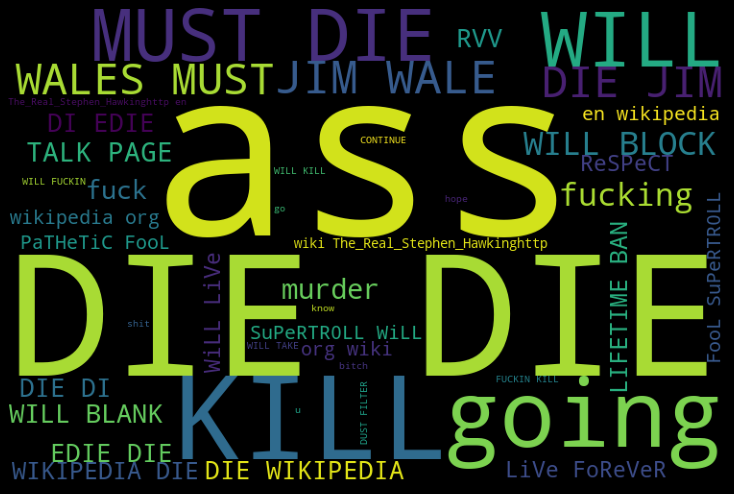

In [9]:
#using the wordcloud of threat comments and check which type of word use for the threat comments.
from wordcloud import WordCloud

threat=train['comment_text'][train['threat'] == 1]
spam_cloud=WordCloud(height=500,width=750,background_color='black',max_words=45).generate(' '.join(threat))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Global
[nltk_data]     Electronic\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
 #Libraries for the text preprocessing
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

In [11]:
#defining the objects
lemmnizer=WordNetLemmatizer()
#stop = stopwords.words('english')
sm=SMOTE()
traincorpus=[]
testcorpus=[]

In [12]:
#data cleaning and preprocessing on train dataset
for i in range(0,len(train)):
    trainreview=re.sub('[^a-zA-Z]',' ',train['comment_text'][i])
    #review=re.sub('[^a-zA-Z]',' ',df['message'][i])
    trainreview=trainreview.lower()
    trainreview=trainreview.split()
    
    trainreview=[lemmnizer.lemmatize(word) for word in trainreview if not word in stopwords.words('english')]
    trainreview=' '.join(trainreview)
    traincorpus.append(trainreview)

In [40]:
#data cleaning and preprocessing on test dataset

for i in range(0,len(test)):
    testreview=re.sub('[^a-zA-Z]',' ',test['comment_text'][i])
    testreview=testreview.lower()
    testreview=testreview.split()
    
    testreview=[lemmnizer.lemmatize(word) for word in testreview if not word in stopwords.words('english')]
    testreview=' '.join(testreview)
    testcorpus.append(testreview)

In [13]:
#creating the TF/IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(max_features=2000)

In [14]:
x=tv.fit_transform(traincorpus).toarray()

In [15]:
#seprating label from the dataframe
y=train['label']

In [16]:
y.value_counts()

0    143346
1     16225
Name: label, dtype: int64

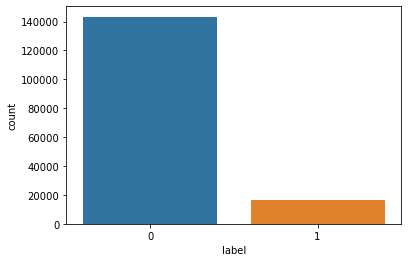

In [72]:
#Plotting count plot for the label
sns.countplot(train['label'])
plt.show()

In [ ]:
#here we can see data imbalaced issue in the label column.
#using Oversampling method to solve the data imbalanced problem.

In [17]:
#checking the shape of x and y:
print(x.shape,y.shape)

(159571, 2000) (159571,)


In [18]:
x.dtype

dtype('float64')

In [19]:
#Coveting Into the 
x = x.astype('float16')

In [77]:
x.dtype

dtype('float16')

In [78]:
#checking the shape of x and y:
print(x.shape,y.shape)

(159571, 2000) (159571,)


In [79]:
y.dtype

dtype('int32')

In [22]:
#performing over sampling method
x_fit,y_fit=sm.fit_resample(x,y)

In [23]:
#checking the y-fit value counts
y_fit.value_counts()

1    143346
0    143346
Name: label, dtype: int64

In [24]:
y_fit.dtype

dtype('int32')

In [25]:
x_fit.dtype

dtype('float16')

In [30]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x_fit,y_fit,test_size=0.20,random_state=0)

In [85]:
#Using the DecisionTreeClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_prednb=nb.predict(x_test)

print('\n==========Outputs of MultinomialNB===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_prednb)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_prednb,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_prednb))


==========Outputs of MultinomialNB===========

==========Accuracy Score===========
Accuracy Score is : 86.80%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.84      0.92      0.87     28522
           1       0.91      0.82      0.86     28817

    accuracy                           0.87     57339
   macro avg       0.87      0.87      0.87     57339
weighted avg       0.87      0.87      0.87     57339
 

=========Confusion Matrix============
[[26113  2409]
 [ 5157 23660]]


In [86]:
#Using the RandomForestClassifier algorithm to check the accuray score,DecisionTreeClassifier and Confusion Matrix:

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predrfc=rfc.predict(x_test)

print('\n==========Outputs of Random Forest Classifier===========')

print('\n==========Accuracy Score===========')
print(f"Accuracy Score is : {accuracy_score(y_test,y_predrfc)* 100:.2f}%\n")

print('======Classification Report=============')
print(classification_report(y_test,y_predrfc,digits=2),'\n')

print('=========Confusion Matrix============')
print(confusion_matrix(y_test,y_predrfc))


==========Outputs of Random Forest Classifier===========

==========Accuracy Score===========
Accuracy Score is : 97.01%

======Classification Report=============
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     28522
           1       0.96      0.98      0.97     28817

    accuracy                           0.97     57339
   macro avg       0.97      0.97      0.97     57339
weighted avg       0.97      0.97      0.97     57339
 

=========Confusion Matrix============
[[27274  1248]
 [  467 28350]]


In [ ]:
#As we can see the Random forest classifer is giving the highest accurcy 97.01%.So selecting the Random Forest Classifier 
#as the final model.

In [ ]:
#Here, we don't use hyperparameter tuning because it takes too much time as well as some algorithm also gives memory error.

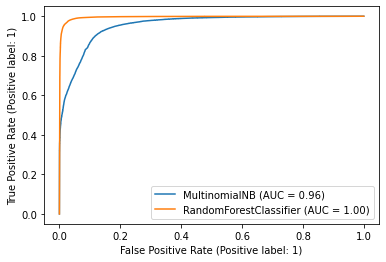

In [39]:
#Using the roc_auc_plot to the same.
dist=plot_roc_curve(nb,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=dist.ax_)

In [ ]:
#Here the Random Forest Classifier shows the highest Accuracy from the ROC Curve.

In [ ]:
#Saving the Random forest claasifier as the final model.

In [41]:
#Saving the model
import joblib
joblib.dump(rfc,'Malignant_Comments_Model.pkl')

['Malignant_Comments_Model.pkl']

In [43]:
#Check our test dataset with best model
xtestdata=tv.fit_transform(testcorpus).toarray()

In [44]:
test_data=rfc.predict(xtestdata)

In [45]:
print(test_data)

[1 0 0 ... 0 1 1]


In [47]:
#Exporting the pridected outcome in csv
df_outcome=pd.DataFrame(test_data)
df_outcome.to_csv("outcome_pred.csv")

In [ ]:
#This complete the model building.